In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv('/content/Bitcoin SV.csv')

In [3]:
df.shape

(1383, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383 entries, 0 to 1382
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1383 non-null   object 
 1   Open      1383 non-null   float64
 2   High      1383 non-null   float64
 3   Low       1383 non-null   float64
 4   Close     1383 non-null   float64
 5   Volume    1383 non-null   float64
 6   Currency  1383 non-null   object 
dtypes: float64(5), object(2)
memory usage: 75.8+ KB


In [5]:
df.head(6)

,Date,Open,High,Low,Close,Volume,Currency
0,2018-11-09,88.302696,89.565697,50.681000,68.750801,2585660.0,USD
1,2018-11-10,70.265503,98.513397,61.192902,87.055801,4748070.0,USD
2,2018-11-11,87.695900,125.112000,83.154297,113.467003,8902820.0,USD
3,2018-11-12,116.455002,123.556000,104.449997,112.064003,10779600.0,USD
4,2018-11-13,109.903000,208.401993,109.299004,208.401993,20708000.0,USD
5,2018-11-14,205.755997,243.785004,155.382004,174.807999,36795500.0,USD


In [6]:
df.tail(6)

,Date,Open,High,Low,Close,Volume,Currency
1377,2022-08-17,61.047604,63.463886,59.338539,59.736420,68828760.0,USD
1378,2022-08-18,59.754913,60.641472,57.639839,57.639839,62202694.0,USD
1379,2022-08-19,57.771713,57.771713,51.379494,51.529137,118431159.0,USD
1380,2022-08-20,51.531807,52.997463,51.199245,52.984997,56692198.0,USD
1381,2022-08-21,52.988400,55.065483,52.985912,54.926193,66055022.0,USD
1382,2022-08-23,55.263344,55.281754,54.428040,54.499168,65700896.0,USD


In [7]:
df.describe()

,Open,High,Low,Close,Volume
count,1383.000000,1383.000000,1383.000000,1383.000000,1.383000e+03
mean,145.108822,151.367995,138.783696,145.063071,7.401203e+08
std,66.871712,71.394934,62.294586,66.895673,8.403071e+08
min,42.502800,48.680569,36.869598,42.751301,2.585660e+06
25%,87.689636,90.870762,84.926109,87.614307,1.493426e+08
50%,146.948868,153.990097,141.524292,146.908524,4.170955e+08
75%,181.926514,188.798889,174.932457,182.040001,9.872793e+08
max,441.326813,491.635376,387.761993,441.394348,7.460265e+09


In [8]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Currency,0


In [9]:
df.duplicated().sum()

0

In [10]:
print(df.dtypes)

Date         object
Open        float64
High        float64
Low         float64
Close       float64
Volume      float64
Currency     object
dtype: object


In [11]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime

In [12]:
print("Column Names:", df.columns)

Column Names: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency'], dtype='object')


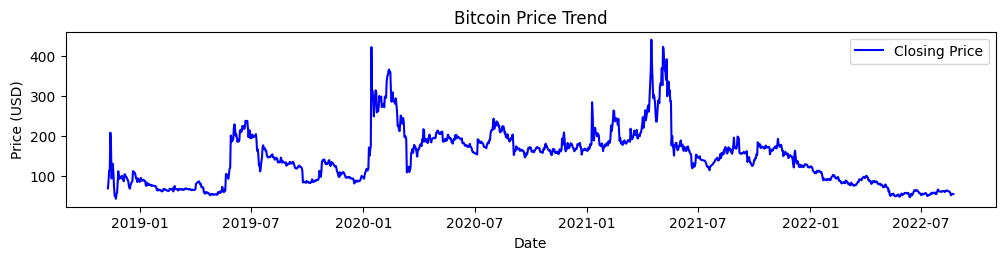

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.plot(df['Date'], df['Close'], label="Closing Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Price Trend")
plt.legend()

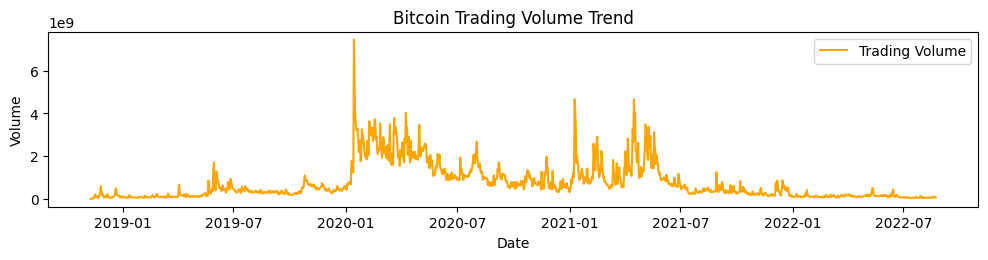

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(2,1,2)
plt.plot(df['Date'], df['Volume'], label="Trading Volume", color='orange')
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Bitcoin Trading Volume Trend")
plt.legend()

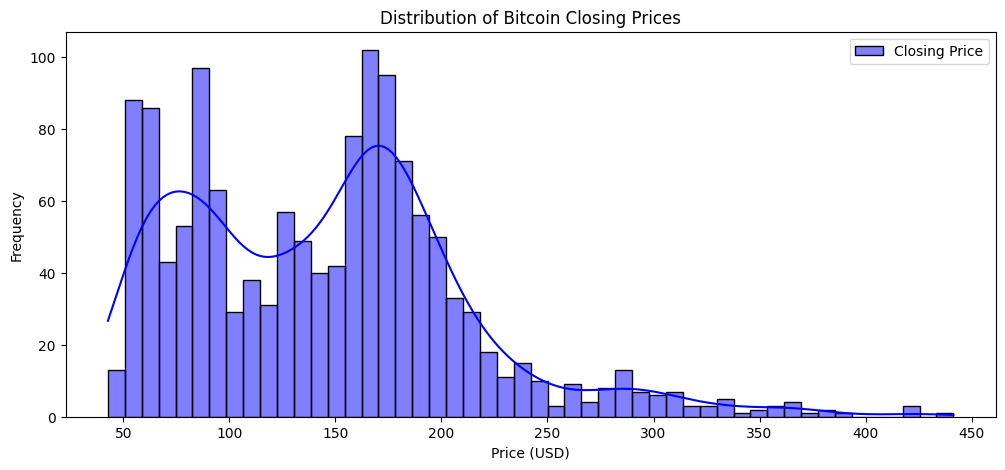

In [15]:
plt.figure(figsize=(12,5))

sns.histplot(df['Close'], bins=50, kde=True, color='blue', label="Closing Price")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.title("Distribution of Bitcoin Closing Prices")
plt.legend()
plt.show()

In [16]:
# Convert numeric columns (removing 'USD' or other symbols)
for col in df.columns:
    df[col] = df[col].astype(str).str.replace(r'[^\d.]', '', regex=True)  # Remove non-numeric characters
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to float (NaN if conversion fails)

In [17]:
print(df.dtypes)

Date          int64
Open        float64
High        float64
Low         float64
Close       float64
Volume      float64
Currency    float64
dtype: object


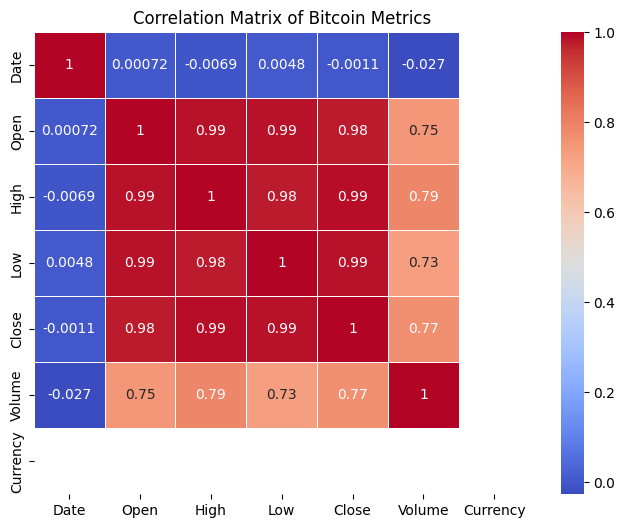

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Bitcoin Metrics")
plt.show()

In [19]:
df.corr()

,Date,Open,High,Low,Close,Volume,Currency
Date,1.000000,0.000716,-0.006851,0.004783,-0.001149,-0.027388,NaN
Open,0.000716,1.000000,0.985371,0.987166,0.977335,0.750027,NaN
High,-0.006851,0.985371,1.000000,0.976503,0.991649,0.787545,NaN
Low,0.004783,0.987166,0.976503,1.000000,0.986487,0.727692,NaN
Close,-0.001149,0.977335,0.991649,0.986487,1.000000,0.769225,NaN
Volume,-0.027388,0.750027,0.787545,0.727692,0.769225,1.000000,NaN
Currency,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df = df.drop(columns=['Currency'], errors='ignore')

In [21]:
df.corr()

,Date,Open,High,Low,Close,Volume
Date,1.000000,0.000716,-0.006851,0.004783,-0.001149,-0.027388
Open,0.000716,1.000000,0.985371,0.987166,0.977335,0.750027
High,-0.006851,0.985371,1.000000,0.976503,0.991649,0.787545
Low,0.004783,0.987166,0.976503,1.000000,0.986487,0.727692
Close,-0.001149,0.977335,0.991649,0.986487,1.000000,0.769225
Volume,-0.027388,0.750027,0.787545,0.727692,0.769225,1.000000


Volatility

In [22]:
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()

In [23]:
df['Returns'] = df['Close'].pct_change()  # Calculate daily returns
df['Volatility'] = df['Returns'].rolling(window=20).std()  # 20-day rolling volatility

In [24]:
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['Upper_Band'] = df['SMA_20'] + (df['Volatility'] * 2)
df['Lower_Band'] = df['SMA_20'] - (df['Volatility'] * 2)

In [25]:
volatility_threshold = df['Volatility'].quantile(0.9)  # Top 10% of volatility
df['High_Volatility'] = df['Volatility'] > volatility_threshold

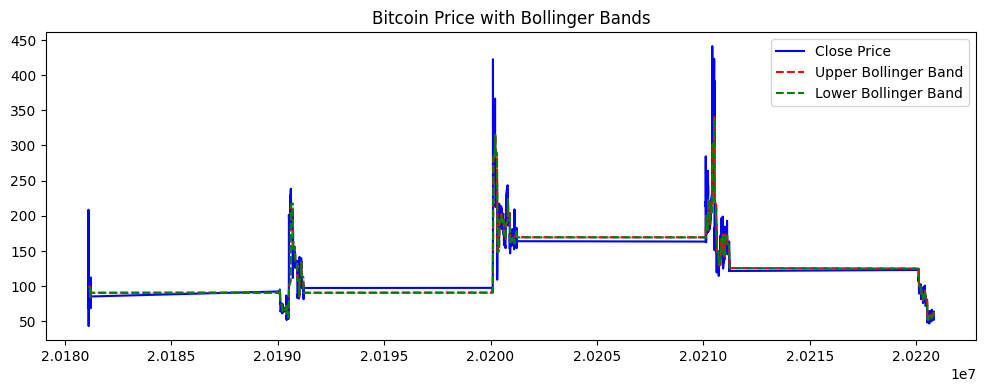

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(df['Date'], df['Close'], label="Close Price", color='blue')
plt.plot(df['Date'], df['Upper_Band'], label="Upper Bollinger Band", color='red', linestyle='dashed')
plt.plot(df['Date'], df['Lower_Band'], label="Lower Bollinger Band", color='green', linestyle='dashed')
plt.fill_between(df['Date'], df['Lower_Band'], df['Upper_Band'], color='gray', alpha=0.2)
plt.title("Bitcoin Price with Bollinger Bands")
plt.legend()
plt.show()

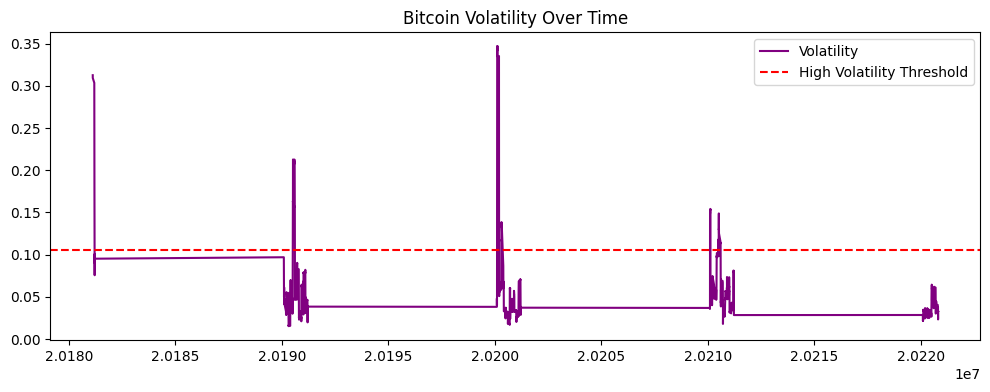

In [27]:
plt.figure(figsize=(12,4))
plt.plot(df['Date'], df['Volatility'], color='purple', label="Volatility")
plt.axhline(volatility_threshold, color='red', linestyle='dashed', label="High Volatility Threshold")
plt.title("Bitcoin Volatility Over Time")
plt.legend()
plt.show()

In [28]:
import plotly.express as px

fig = px.scatter_3d(df, x='Date', y='Volatility', z='Volume', color='Volatility',
                     title='3D Crypto Volatility Analysis')

fig.show()

Sudden price jumps

In [29]:
df['Daily_Change'] = df['Close'].pct_change() * 100  # Convert to percentage

In [30]:
from scipy.stats import zscore

df['Z_Score'] = np.abs(zscore(df['Daily_Change']))
df['Price_Jump'] = df['Z_Score'] > 2.5  # Mark outliers as price jumps

print(df[['Date', 'Daily_Change', 'Z_Score', 'Price_Jump']].head(2))

       Date  Daily_Change  Z_Score  Price_Jump
0  20181109           NaN      NaN       False
1  20181110     26.625145      NaN       False


In [31]:
# Compute rolling standard deviation (volatility)
df['Rolling_Std'] = df['Daily_Change'].rolling(window=20).std()

# Define price jump when daily change > 2 times rolling standard deviation
df['Price_Jump_Volatility'] = np.abs(df['Daily_Change']) > (2 * df['Rolling_Std'])

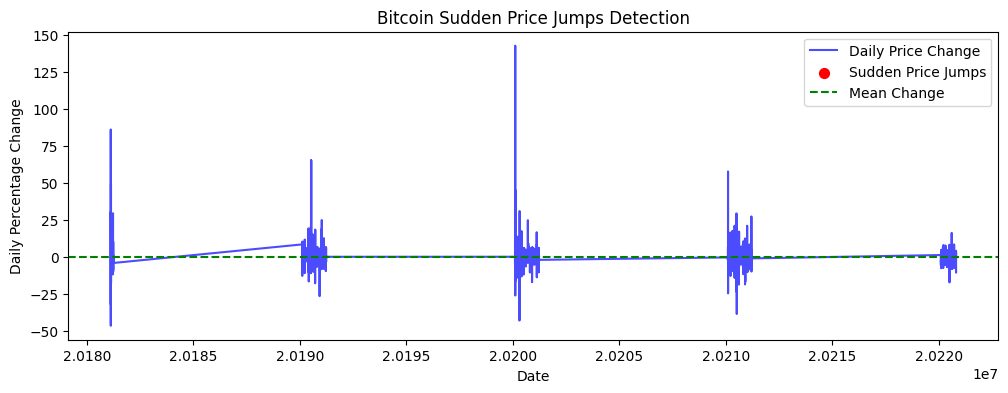

In [32]:
plt.figure(figsize=(12,4))
plt.plot(df['Date'], df['Daily_Change'], label="Daily Price Change", color='blue', alpha=0.7)
plt.scatter(df[df['Price_Jump']]['Date'], df[df['Price_Jump']]['Daily_Change'],
            color='red', label="Sudden Price Jumps", marker='o', s=50)

plt.axhline(df['Daily_Change'].mean(), color='green', linestyle='dashed', label="Mean Change")
plt.title("Bitcoin Sudden Price Jumps Detection")
plt.xlabel("Date")
plt.ylabel("Daily Percentage Change")
plt.legend()
plt.show()

In [33]:
import plotly.express as px

fig = px.scatter_3d(df, x='Date', y='Daily_Change', z='Volume',
                    color='Price_Jump', title="3D View of Bitcoin Price Jumps")
fig.show()

Trade classification

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
df['Next_Day_Change'] = df['Close'].pct_change().shift(-1) * 100
df['Trade_Label'] = np.where(df['Next_Day_Change'] >= 2, 'Good', 'Bad')


df.drop(columns=['Next_Day_Change'], inplace=True)

In [36]:
print(df['Trade_Label'].value_counts())

Trade_Label
Bad     1007
Good     376
Name: count, dtype: int64


In [37]:
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Volatility']
X = df[features]
y = df['Trade_Label']

y = y.map({'Good': 1, 'Bad': 0})

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
y_pred = clf.predict(X_test)

In [41]:
importances = clf.feature_importances_
feature_names = X.columns

sorted_indices = np.argsort(importances)[::-1]

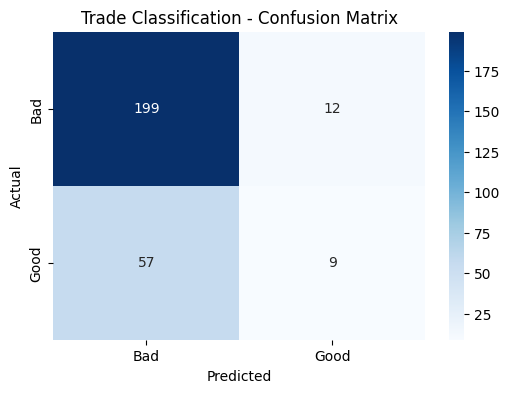

In [42]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Trade Classification - Confusion Matrix')
plt.show()

In [43]:
import plotly.figure_factory as ff

cm = confusion_matrix(y_test, y_pred)

labels = ["Bad", "Good"]
fig = ff.create_annotated_heatmap(
    z=cm,
    x=labels,
    y=labels,
    colorscale='Blues',
    showscale=True,
    annotation_text=np.array(cm).astype(str)
)
fig.update_layout(
    title="Trade Classification - Confusion Matrix (Plotly)",
    xaxis_title="Predicted",
    yaxis_title="Actual",
)
fig.show()